In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("white")
import re

In [3]:
df= pd.read_excel('pivot_table_example.xlsx', sheet_name="aimondo_template_jack_500_freq_", decimal='.',converters={'delivery_time.1':str})
df= df.dropna(axis=1, how='all')
#df= df.fillna(np.nan)
df.head(1)

,product_id,gtin_ean,brand,manufacturer_nr,title,date,class,amount_of_sellers,product_name_channel,seller,reviews,rating_stars,delivery_time.1,price.1,price_with_shipping,shipping_cost.1,url
0,16250,18208019021,Nikon,JAA011DB,"Nikon AF 1,4/50 D Nikon FX | 100 Wochen Zusat...",2018-01-29,1,3.0,Nikon 50mm f/1.4D AF Nikkor,ebay.co.uk,99.6,5.0,1,215.0,215.0,0.0,https://www.idealo.co.uk/go/7142509559.html?ca...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2488 entries, 0 to 2487
Data columns (total 17 columns):
product_id              2488 non-null int64
gtin_ean                2488 non-null int64
brand                   2488 non-null object
manufacturer_nr         2488 non-null object
title                   2488 non-null object
date                    2488 non-null object
class                   2488 non-null object
amount_of_sellers       2450 non-null float64
product_name_channel    2450 non-null object
seller                  2450 non-null object
reviews                 2349 non-null float64
rating_stars            2350 non-null float64
delivery_time.1         2450 non-null object
price.1                 2450 non-null float64
price_with_shipping     2450 non-null float64
shipping_cost.1         2450 non-null float64
url                     2450 non-null object
dtypes: float64(6), int64(2), object(9)
memory usage: 330.5+ KB


In [5]:
df.isnull().sum()

product_id                0
gtin_ean                  0
brand                     0
manufacturer_nr           0
title                     0
date                      0
class                     0
amount_of_sellers        38
product_name_channel     38
seller                   38
reviews                 139
rating_stars            138
delivery_time.1          38
price.1                  38
price_with_shipping      38
shipping_cost.1          38
url                      38
dtype: int64

In [7]:
df['delivery_time.1'].replace('~2', '2')
df['delivery_time.1'].replace('Next day delivery', '1')
#df['delivery_time.1'][697]

In [13]:
deltime=[]


In [14]:
df_del= df[['product_id','gtin_ean','brand','manufacturer_nr','title','date','class','delivery_time.1']]
df_del= df_del.dropna(how= 'any')
print(len(df_del))

2450


In [15]:
a=[]
deltime=[]
i=0
for col, item in df_del['delivery_time.1'].iteritems():
    i+=1
    if str(item).isdigit():
        deltime.append(item)
    else:
        #print(item)
        #print(i)
        #print(type(item))
        li= re.findall(r'\b\d+\b', item)
        if(len(li)!= 0):
            deltime.append((max(re.findall(r'\b\d+\b', item))))
        else:
            deltime.append(np.nan)

In [16]:
#df_del.drop(['del_time'], axis=1,inplace=True)
df_del.insert(loc=0,column='del_time', value=pd.to_numeric(deltime))
df_del.del_time.fillna(pd.to_numeric(df_del.del_time).mean(), inplace=True)

In [17]:
pd.to_numeric(df_del.del_time).mean()

4.026112185686654

In [18]:
df_del_brand_mean= df_del.groupby(['brand']).mean()
df_del_brand_min= df_del.groupby(['brand']).min()
df_del_brand_min['delivery_time.1']=df_del_brand_min['delivery_time.1'].replace('Next day delivery',2)
df_del_brand_min['delivery_time.1']

brand
Canon        1 - 5 working days
Crumpler       3-4 working days
Cullmann                      2
DJI          1 - 5 working days
Datacolor                   1.5
Gitzo                       1.5
GoPro                         2
Leica                       1.5
Manfrotto    1 - 3 working days
Nikon                         0
Nissin            1 working day
Nokia        1 - 5 working days
Olympus                     1.5
Name: delivery_time.1, dtype: object

In [19]:
# the isdigt() and extract() BID of Pandas are soooooo stupid!!!!!!!
def isDigit(x):
    try:
        float(x)
        return True
    except ValueError:
        return False

In [20]:
deli=[]
for col, item in df_del_brand_min['delivery_time.1'].iteritems():
    if isDigit(str(item)):
        deli.append(item)
    else:
        li= re.findall(r'\b\d+\b', item)
        li= [float(i) for i in li]
        if(len(li)!= 0):
            print(sum(li)/len(li))
            deli.append(sum(li)/len(li))
        else:
            deli.append(np.nan)

3.0
3.5
3.0
2.0
1.0
3.0


In [21]:
df_del_brand_min.insert(loc=0,column='deli', value=pd.to_numeric(deli))
df_del_brand_min

,deli,del_time,product_id,gtin_ean,title,date,delivery_time.1
brand,,,,,,,
Canon,3.0,1.0,10538,4549292009873,"Canon EF 1,2/50 L USM Canon EF",2018-01-29,1 - 5 working days
Crumpler,3.5,1.0,67534,4036957108243,Crumpler Proper Roady 4500 dunkelrot,2018-01-29,3-4 working days
Cullmann,2.0,1.0,74678,4007134015869,Cullmann CUlight FR 60 Canon,2018-01-29,2
DJI,3.0,1.0,10807,4251088420143,DJI Inspire 1 Pro & Focus Fernsteuerung,2018-01-29,1 - 5 working days
Datacolor,1.5,1.0,71642,875720001404,Datacolor Spyder 5 Elite,2018-01-29,1.5
Gitzo,1.5,1.0,63580,8024221620986,Gitzo STATIV Mountaineer 4 Seg. Serie 3,2018-01-29,1.5
GoPro,2.0,2.0,10199,818279017809,GoPro HERO5 Black,2018-01-29,2
Leica,1.5,1.0,62317,4022243103702,"Leica 1,4/35 Summilux-M Asph. Leica M silber",2018-01-29,1.5
Manfrotto,2.0,1.0,38760,8024221299311,Manfrotto 504HD Pro Fluid Videokopf,2018-01-29,1 - 3 working days


In [22]:
df_brand_count= df.groupby(['brand']).count()
df_brand_avg= df.groupby(['brand']).mean()
df_brand_min= df.groupby(['brand']).min()

In [23]:
df_brand_count.index

Index(['Canon', 'Crumpler', 'Cullmann', 'DJI', 'Datacolor', 'Gitzo', 'GoPro',
       'Leica', 'Manfrotto', 'Nikon', 'Nissin', 'Nokia', 'Olympus'],
      dtype='object', name='brand')

## Brand
### Max & Min & Avg Anzahl

In [24]:
max_name= df_brand_count.seller.argmax()
max_= df_brand_count.seller.max()
min_name= df_brand_count.seller.argmin()
min_= df_brand_count.seller.min()
print("Max: "+ str(max_name)+ " " + str(max_) +'\n' +"Min: "+ str(min_name) + " "+ str(min_) )
avg_= sum(df_brand_count.seller.values)/len(df_brand_count.seller.values)
print("Average: "+ str(avg_))

Max: Canon 900
Min: Datacolor 23
Average: 188.46153846153845


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: 'argmax' is deprecated. Use 'idxmax' instead. The behavior of 'argmax' will be corrected to return the positional maximum in the future. Use 'series.values.argmax' to get the position of the maximum now.
  """Entry point for launching an IPython kernel.
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: 'argmin' is deprecated. Use 'idxmin' instead. The behavior of 'argmin' will be corrected to return the positional minimum in the future. Use 'series.values.argmin' to get the position of the minimum now.
  This is separate from the ipykernel package so we can avoid doing imports until


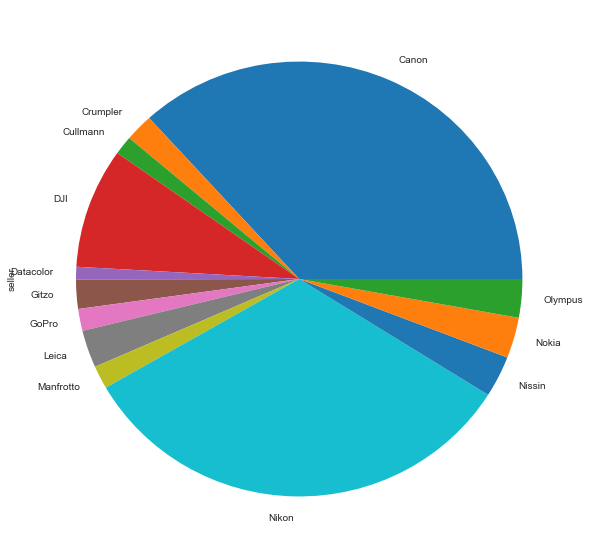

In [155]:
df_brand_count.seller.plot(kind='pie', figsize=(10,10))

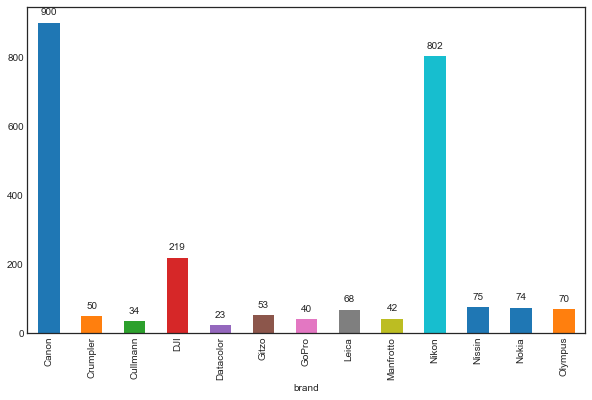

In [25]:
ax= df_brand_count.seller.plot(kind='bar', figsize=(10,6))
for p in ax.patches:
    ax.annotate(str(int(p.get_height())), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

In [26]:
hist1= df_brand_count.seller
hist2= df_brand_avg.price_with_shipping
hist3= df_brand_avg['price.1']

In [27]:
df_change= df[df['delivery_time.1'].astype(str).str.isdigit()==False]
df_change.head(10)
len(df_change)

1668

In [28]:
df_change['delivery_time.1'].str.extract('(\d+)').isnull().sum()

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  """Entry point for launching an IPython kernel.


420

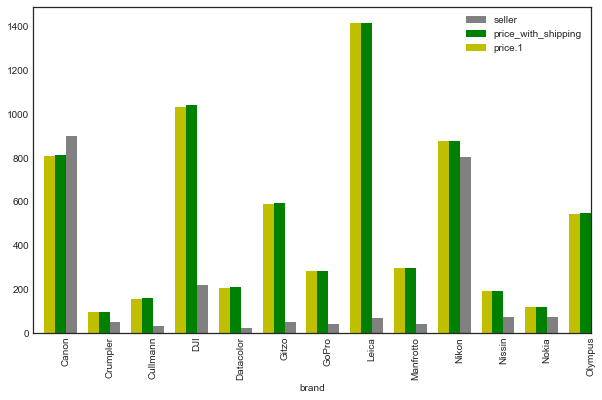

In [29]:
#Hier kann man das Deteils des Graphs anpassen
fig = plt.figure()
ax = fig.add_subplot(111)
hist1.plot(kind='bar',ax=ax, color='grey', position=0, width=0.25, figsize=(10,6),legend=True)
hist2.plot(kind='bar', color='green', position=1, width=0.25,legend=True)
hist3.plot(kind='bar',  color='y', position=2, width=0.25,legend=True)
#ax2 = ax.twinx()
#ax2.plot(df_brand_count.index, , 'r.')

In [30]:
d= {'Anzahl_von_Produkt_id': hist1, 'Mittelwert_von_price_with_shipping':hist2, 'Mittelwert_von_price_1':hist3}
brand_data= pd.DataFrame(data= d)

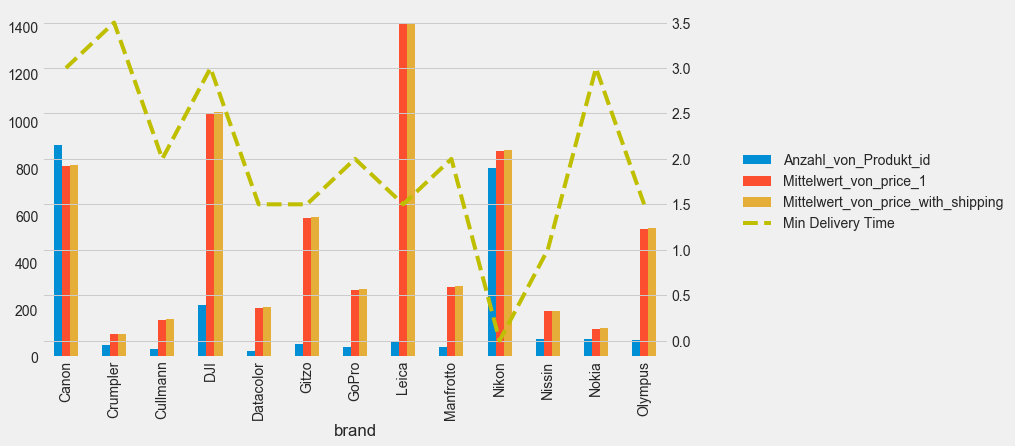

In [31]:
with plt.style.context('fivethirtyeight'):
    f = plt.figure()
    ax= brand_data.plot(kind="bar", figsize= (10,6))
    plt.legend(loc='center left', bbox_to_anchor=(1.1, 0.5))
    #min_deli_time.plot(ax = ax.twinx(), color= 'green')
    ax2= ax.twinx()
    ax.grid(None)
    df_del_brand_min['deli'].plot(kind= 'line',ax = ax2, color='y', style='--',legend=True)
    plt.legend(['Min Delivery Time'],loc='center left', bbox_to_anchor=(1.1, 0.38))
    #ax2.set_yticks(np.linspace(ax2.get_yticks()[0], ax2.get_yticks()[-1], len(ax.get_yticks())))

### Kaufpreis

In [33]:
df_brand_avg['price.1']

count      13.000000
mean      509.374880
std       415.021060
min        95.068400
25%       192.978933
50%       296.339762
75%       810.398044
max      1416.497941
Name: price.1, dtype: float64

In [34]:
df_brand_avg['price.1'].describe()

count      13.000000
mean      509.374880
std       415.021060
min        95.068400
25%       192.978933
50%       296.339762
75%       810.398044
max      1416.497941
Name: price.1, dtype: float64

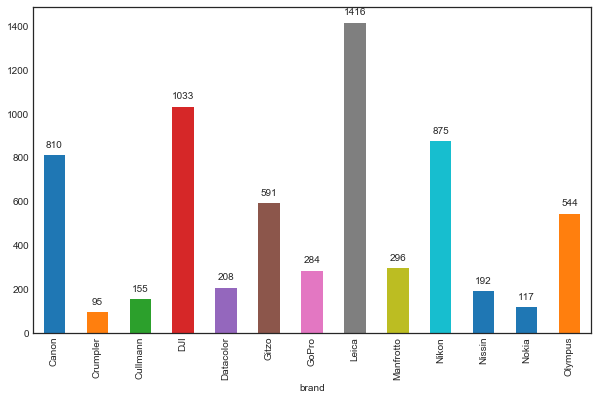

In [35]:
ax_brand_price= df_brand_avg['price.1'].plot(kind='bar', figsize=(10,6))
for p in ax_brand_price.patches:
    ax_brand_price.annotate(str(int(p.get_height())), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

## Produktebene

In [36]:
bsp_product= df.loc[df['gtin_ean']==18208021635]
aktuell_preis= 1400
bsp_product

,product_id,gtin_ean,brand,manufacturer_nr,title,date,class,amount_of_sellers,product_name_channel,seller,reviews,rating_stars,delivery_time.1,price.1,price_with_shipping,shipping_cost.1,url
55,21599,18208021635,Nikon,JAA801DA,"Nikon AF-S 2,8/14-24 G ED Nikon FX | 100 Woch...",2018-01-29,1,11.0,Nikon 14-24mm f/2.8G ED AF-S Nikkor,ebay.co.uk,98.7,5.0,2,1099.00,1099.00,0.00,https://www.idealo.co.uk/go/315845118548090659...
56,21599,18208021635,Nikon,JAA801DA,"Nikon AF-S 2,8/14-24 G ED Nikon FX | 100 Woch...",2018-01-29,1,11.0,Nikon 14-24mm f/2.8G ED AF-S Nikkor,SLRHut.co.uk,185.0,4.5,3,1249.00,1249.00,0.00,https://www.idealo.co.uk/go/9684070407.html?ca...
57,21599,18208021635,Nikon,JAA801DA,"Nikon AF-S 2,8/14-24 G ED Nikon FX | 100 Woch...",2018-01-29,1,11.0,Nikon 14-24mm f/2.8G ED AF-S Nikkor,ukcameraltd.co.uk,72.0,5.0,8,1347.99,1347.99,0.00,https://www.idealo.co.uk/go/6302037556.html?ca...
58,21599,18208021635,Nikon,JAA801DA,"Nikon AF-S 2,8/14-24 G ED Nikon FX | 100 Woch...",2018-01-29,1,11.0,Nikon 14-24mm f/2.8G ED AF-S Nikkor,Amazon-marketplace.co.uk,26.0,4.5,2,1599.00,1603.68,4.68,https://www.idealo.co.uk/go/318088380619843806...
59,21599,18208021635,Nikon,JAA801DA,"Nikon AF-S 2,8/14-24 G ED Nikon FX | 100 Woch...",2018-01-29,1,11.0,Nikon 14-24mm f/2.8G ED AF-S Nikkor,amazon.co.uk,21.0,4.0,4,1619.00,1619.00,0.00,https://www.idealo.co.uk/go/315126077024790490...
60,21599,18208021635,Nikon,JAA801DA,"Nikon AF-S 2,8/14-24 G ED Nikon FX | 100 Woch...",2018-01-29,1,11.0,Nikon 14-24mm f/2.8G ED AF-S Nikkor,Currys PC World (UK),23.0,2.0,1,1619.00,1619.00,0.00,https://www.idealo.co.uk/go/3753718088.html?ca...
61,21599,18208021635,Nikon,JAA801DA,"Nikon AF-S 2,8/14-24 G ED Nikon FX | 100 Woch...",2018-01-29,1,11.0,Nikon 14-24mm f/2.8G ED AF-S Nikkor,johnlewis.com,5.0,4.0,2,1619.00,1619.00,0.00,https://www.idealo.co.uk/go/7767365039.html?ca...
62,21599,18208021635,Nikon,JAA801DA,"Nikon AF-S 2,8/14-24 G ED Nikon FX | 100 Woch...",2018-01-29,1,11.0,Nikon 14-24mm f/2.8G ED AF-S Nikkor,Photospecialist.co.uk,29.0,5.0,5,1615.70,1622.62,6.92,https://www.idealo.co.uk/go/8256602539.html?ca...
63,21599,18208021635,Nikon,JAA801DA,"Nikon AF-S 2,8/14-24 G ED Nikon FX | 100 Woch...",2018-01-29,1,11.0,Nikon 14-24mm f/2.8G ED AF-S Nikkor,Very.co.uk,7.0,3.0,5,1619.00,1622.99,3.99,https://www.idealo.co.uk/go/7110679842.html?ca...
64,21599,18208021635,Nikon,JAA801DA,"Nikon AF-S 2,8/14-24 G ED Nikon FX | 100 Woch...",2018-01-29,1,11.0,Nikon 14-24mm f/2.8G ED AF-S Nikkor,wexphotovideo.com (UK),3.0,3.5,1,1719.00,1719.00,0.00,https://www.idealo.co.uk/go/4135924523.html?ca...


([<matplotlib.patches.Wedge at 0x1118e9630>,
 [Text(-0.646564,0.889919,'Without Shipping Cost'),
  Text(0.646564,-0.889919,'With Shipping Cost')],
 [Text(-0.352671,0.48541,'70.0%'), Text(0.352671,-0.48541,'30.0%')])

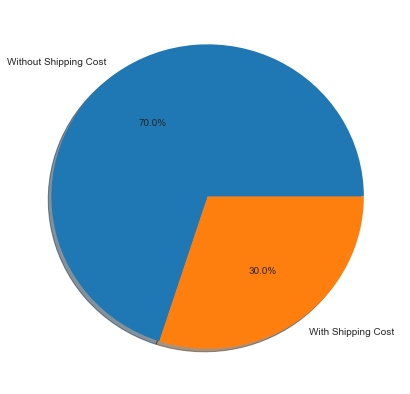

In [214]:
fig = plt.gcf()
fig.set_size_inches(7, 7)
without_shipping= len(bsp_product[bsp_product['shipping_cost.1']==0])/len(bsp_product)
labels = 'Without Shipping Cost', 'With Shipping Cost'
fracs = [without_shipping, 1-without_shipping]
plt.pie(fracs, labels=labels, autopct='%1.1f%%', shadow=True)

In [181]:
# Price range top 1~10 !!! Versandzeit ergaenzen #### Tabelle wie frueher
## % Verteilung keine Versandkosten : wie viele Prozent Anbieter brauchen keine VK
bsp_product['price_with_shipping'].nlargest(10)

64    1719.00
63    1622.99
62    1622.62
59    1619.00
60    1619.00
61    1619.00
58    1603.68
57    1347.99
56    1249.00
55    1099.00
Name: price_with_shipping, dtype: float64

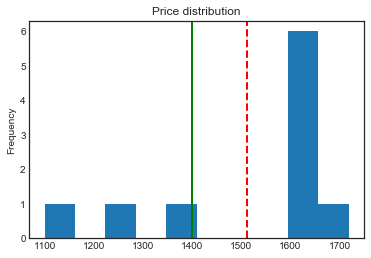

In [217]:
# % Verteilung mit Versandkosten
# Platzierung im Marktplatz mit aktuellem Preis
bsp_product['price_with_shipping'].plot(kind= 'hist', title= 'Price distribution')
plt.axvline(bsp_product['price_with_shipping'].mean(), color='red', linestyle='dashed', linewidth=2)
plt.axvline(aktuell_preis, color='green',  linewidth=2)

In [38]:
# Durchschnittliche Lieferzeit
bsp_product['delivery_time.1'].mean()

238241255.1

## Class

### 5,6,7, inconclusive mit Detailinfos, welcher Brand am häufigsten

In [389]:
class_low= pd.concat([df[ df['class']==5], df[df['class']=='inconclusive']])
class_low_count= class_low.groupby(['brand']).count()
class_low_min= class_low.groupby(['brand']).min()

In [390]:
class_low_count

,product_id,gtin_ean,manufacturer_nr,title,date,class,amount_of_sellers,product_name_channel,seller,reviews,rating_stars,delivery_time.1,price.1,price_with_shipping,shipping_cost.1,url
brand,,,,,,,,,,,,,,,,
Canon,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5
Crumpler,33,33,33,33,33,33,33,33,33,31,31,33,33,33,33,33
DJI,5,5,5,5,5,5,5,5,5,4,5,5,5,5,5,5
Leica,16,16,16,16,16,16,16,16,16,13,15,16,16,16,16,16
Nikon,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20
Nokia,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2


In [397]:
d2= {'Anzahl_von_Produkt_id': class_low_count.seller, 'Mittelwert_von_price_with_shipping':class_low_min['price_with_shipping'], 'Mittelwert_von_price_1':class_low_min['price.1']}
class_low_brand_data= pd.DataFrame(data= d2)

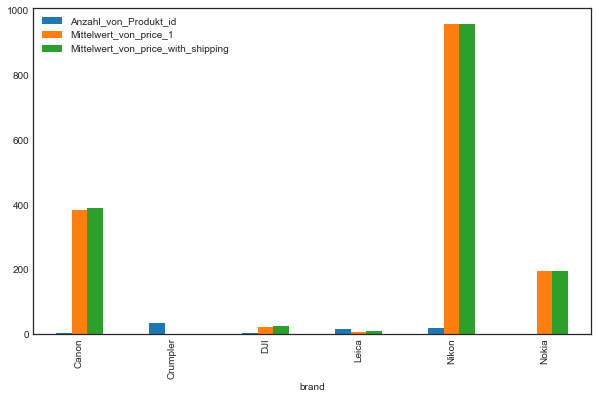

In [414]:
class_low_brand_data.plot(kind='bar', figsize=(10,6))

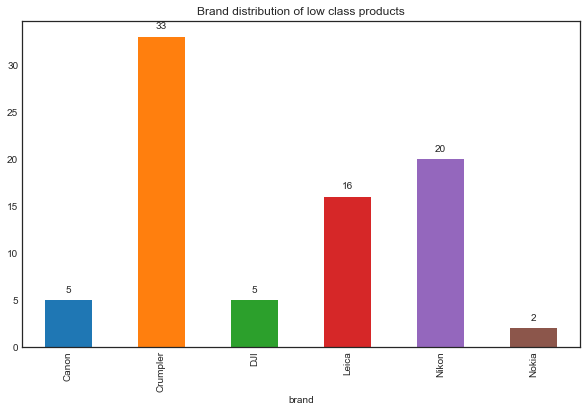

In [413]:
ax_low_class = class_low_brand_data['Anzahl_von_Produkt_id'].plot(kind="bar", figsize= (10,6), title='Brand distribution of low class products')
#plt.legend(loc='center left', bbox_to_anchor=(1.1, 0.5))
for p in ax_low_class.patches:
    ax_low_class.annotate(str(int(p.get_height())), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Vergleich mit Konkurrenten

In [40]:
df2= pd.read_csv('aimondo_template_jack_500.txt', sep='\t', thousands='.', decimal=',')
df2= df2.dropna(axis=1, how='all')
df2.head()

,product_id,gtin_ean,brand,manufacturer_nr,title,min_price,price,max_price,date,class,...,reviews,rating_stars,delivery_time.1,price.1,price_with_shipping,shipping_cost.1,suggested_retail_price,url,extra_one,extra_two
0,12718,4960999326429,Canon,1056B005,"Canon EF 1,2/85 mm L II USM Canon EF",1760.952381,1849.0,1941.45,2017-12-08,1,...,NaN,NaN,1,1905.00,1905.00,0.00,2239.0,http://www.amazon.de/dp/B000EW9Y4M,prime,BUY BOX!
1,12718,4960999326429,Canon,1056B005,"Canon EF 1,2/85 mm L II USM Canon EF",1760.952381,1849.0,1941.45,2017-12-08,1,...,100229.0,5.0,15,2238.99,2238.99,0.00,2239.0,http://www.amazon.de/dp/B000EW9Y4M,NaN,NaN
2,12718,4960999326429,Canon,1056B005,"Canon EF 1,2/85 mm L II USM Canon EF",1760.952381,1849.0,1941.45,2017-12-08,1,...,37623.0,5.0,5,2298.00,2298.00,0.00,2239.0,http://www.amazon.de/dp/B000EW9Y4M,NaN,NaN
3,12718,4960999326429,Canon,1056B005,"Canon EF 1,2/85 mm L II USM Canon EF",1760.952381,1849.0,1941.45,2017-12-08,1,...,700.0,4.5,7,2375.56,2375.56,0.00,2239.0,http://www.amazon.de/dp/B000EW9Y4M,NaN,NaN
4,12718,4960999326429,Canon,1056B005,"Canon EF 1,2/85 mm L II USM Canon EF",1760.952381,1849.0,1941.45,2017-12-08,1,...,57697.0,4.5,6,2431.69,2432.48,0.79,2239.0,http://www.amazon.de/dp/B000EW9Y4M,NaN,NaN


In [86]:
len(df2)

2815

### Abweichungen vom eigenen Preis
* Export alle Abweichungen > XY

In [52]:
# Kokurrente, deren Preis 20% weniger als mein Preis ist.
konk= df2[df2['price'].apply(lambda x: x*0.8) > df2['price.1']]
konk.head(1) #length: 107

,product_id,gtin_ean,brand,manufacturer_nr,title,min_price,price,max_price,date,class,...,reviews,rating_stars,delivery_time.1,price.1,price_with_shipping,shipping_cost.1,suggested_retail_price,url,extra_one,extra_two
208,24497,4960999483283,Canon,2297B005,"Canon EF 2,0/200 L IS USM Canon EF",5237.142857,5499.0,5773.95,2017-12-08,5,...,NaN,NaN,1,1105.99,1105.99,0.0,1476.0,http://www.amazon.de/dp/B00007EE9B,prime,BUY BOX!


In [43]:
konk_count = konk.groupby(['gtin_ean','title']).count()
konk_min = konk.groupby(['gtin_ean','title']).min()
konk_avg= konk.groupby(['gtin_ean','title']).mean()

In [342]:
#seller = konk.groupby(['gtin_ean','title']).count().seller
### Preisdifferenz zwischen min price und mein preis
konk_ean= konk.groupby(['gtin_ean','title'])['gtin_ean','brand','seller','price','price.1','price_with_shipping','delivery_time.1']
#konk_data.insert(loc=0,column='min_price', value=konk_min['price_with_shipping'].values)


In [346]:
konk_ean.unique()

gtin_ean       title                                                                        
18208022137    Nikon AF-S DX 3,5-5,6/18-140 G ED VR Nikon DX  | 100 Wochen Zusatzgarantie         [18208022137]
18208200504    Nikon AF-S DX 4,0-5,6/55-200 G ED VR II Nikon DX  | 100 Wochen Zusatzgarantie      [18208200504]
18208200597    Nikon AF-P DX 3,5-5,6/18-55 G VR Nikon DX  | 100 Wochen Zusatzgarantie             [18208200597]
18208200603    Nikon AF-P DX 3,5-5,6/18-55 G Nikon DX  | 100 Wochen Zusatzgarantie                [18208200603]
18208944712    Nikon D810,AF-S 24-120 ED VR                                                       [18208944712]
18208955565    Nikon D7500 + AF-S DX NIKKOR 18-300 VR 3.5-6.3                                     [18208955565]
18208956487    Nikon D850 Kit AF-S 24-120 mm 1:4G ED VR                                           [18208956487]
18208997862    Nikon Coolpix S810C weiß                                                           [18208997862]
81827901803

In [384]:
konk_data= pd.DataFrame()
konk_data.insert(loc=0, column='min_price', value= konk_min['price_with_shipping'])
konk_data.insert(loc=0, column= 'my_price', value= konk_min['price'])
konk_data.insert(loc=0, column= 'brand', value= konk_min['brand'])
konk_data.insert(loc=0, column= 'price_diff', value= (konk_min['price']-konk_min['price_with_shipping']))
konk_data.insert(loc=0, column= 'price_diff_percent', value= ((konk_min['price']-konk_min['price_with_shipping'])/konk_min['price']))

In [385]:
konk_data

,,price_diff_percent,price_diff,brand,my_price,min_price
gtin_ean,title,,,,,
18208022137,"Nikon AF-S DX 3,5-5,6/18-140 G ED VR Nikon DX | 100 Wochen Zusatzgarantie",0.273984,110.95,Nikon,404.95,294.00
18208200504,"Nikon AF-S DX 4,0-5,6/55-200 G ED VR II Nikon DX | 100 Wochen Zusatzgarantie",0.442456,126.10,Nikon,285.00,158.90
18208200597,"Nikon AF-P DX 3,5-5,6/18-55 G VR Nikon DX | 100 Wochen Zusatzgarantie",0.497510,108.90,Nikon,218.89,109.99
18208200603,"Nikon AF-P DX 3,5-5,6/18-55 G Nikon DX | 100 Wochen Zusatzgarantie",0.657143,115.00,Nikon,175.00,60.00
18208944712,"Nikon D810,AF-S 24-120 ED VR",0.810740,3080.00,Nikon,3799.00,719.00
18208955565,Nikon D7500 + AF-S DX NIKKOR 18-300 VR 3.5-6.3,0.697695,1604.00,Nikon,2299.00,695.00
18208956487,Nikon D850 Kit AF-S 24-120 mm 1:4G ED VR,0.843662,3880.00,Nikon,4599.00,719.00
18208997862,Nikon Coolpix S810C weiß,0.971674,232.23,Nikon,239.00,6.77
818279018035,GoPro Hero5 Black inkl. Freevision Gimbal & Gopro Zusatz Akku schwarz,0.424096,283.72,GoPro,669.00,385.28


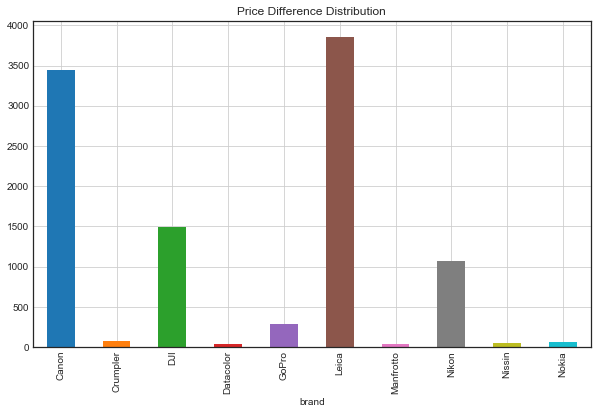

In [383]:
# Aufgeschlüsselt nach Brand
### Durchschnittliche Preisabweichung(mein und guenstig) pro Brand => Verteilung

konk_data.groupby(['brand']).mean()['price_diff'].plot(kind='bar', figsize=(10,6),grid=True, title="Price Difference Distribution")

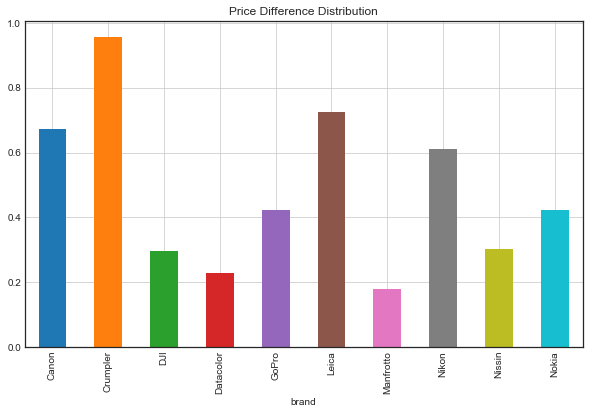

In [386]:
konk_data.groupby(['brand']).mean()['price_diff_percent'].plot(kind='bar', figsize=(10,6),grid=True, title="Price Difference Distribution")

## Wettbewerberinfos
bsp Produkt: 4960999483283

In [55]:
df_wettbewerb= df2[df2['gtin_ean']==4960999483283].seller

In [56]:
df_wettbewerb

208                 amazon
213               TOPdeals
216         KÖSTER MÜNSTER
230         FOXTROT MARINE
233              astroshop
236             ELECTRONIS
242             SEI DESIGN
245    schreiner-modellbau
249            nrsolutions
255          luckyshopping
Name: seller, dtype: object

In [64]:
df_TOPdeals= df2[df2['seller']== 'TOPdeals']

In [68]:
df_TOPdeals

,product_id,gtin_ean,brand,manufacturer_nr,title,min_price,price,max_price,date,class,...,reviews,rating_stars,delivery_time.1,price.1,price_with_shipping,shipping_cost.1,suggested_retail_price,url,extra_one,extra_two
12,68625,4549292010176,Canon,9521B005,"Canon EF 3,5-5,6/24-105 IS STM Canon EF",360.952381,379.00,397.9500,2017-12-08,1,...,707.0,5.0,12,410.64,410.64,0.0,505.00,http://www.amazon.de/dp/B00NLBGCYI,NaN,NaN
14,12863,4960999189949,Canon,8806A007,"Canon EF 4,0/17-40 L USM Canon EF",659.933333,692.93,727.5765,2017-12-08,1,...,707.0,5.0,12,748.92,748.92,0.0,819.00,http://www.amazon.de/dp/B0000C4GAM,NaN,NaN
19,12466,4960999207322,Canon,9322A006,"Canon EF 3,5-5,6/28-300 L IS USM Canon EF",2189.523810,2299.00,2413.9500,2017-12-08,1,...,707.0,5.0,12,2419.98,2419.98,0.0,2659.00,http://www.amazon.de/dp/B0001G8VFY,NaN,NaN
26,61828,4549292037692,Canon,0570C005,"Canon EF 1,8/50 STM Canon EF",106.190476,111.50,117.0750,2017-12-08,1,...,707.0,5.0,12,131.80,131.80,0.0,129.00,http://www.amazon.de/dp/B00XKSBMQA,NaN,NaN
44,55506,4960999845791,Canon,5178B005,"Canon EF 2,0/35 IS USM Canon EF",453.323810,475.99,499.7895,2017-12-08,1,...,707.0,5.0,12,510.06,510.06,0.0,599.00,http://www.amazon.de/dp/B00A33C4A8,NaN,NaN
47,47500,4960999780719,Canon,5175B005,"Canon EF 2,8/24-70 L II USM Canon EF",1694.285714,1779.00,1867.9500,2017-12-08,1,...,707.0,5.0,12,1884.48,1884.48,0.0,2319.00,http://www.amazon.de/dp/B0076FS09A,NaN,NaN
50,12669,4960999213019,Canon,2515A012,"Canon EF 1,4/50 USM Canon EF",312.380952,328.00,344.4000,2017-12-08,1,...,707.0,5.0,12,371.41,371.41,0.0,449.00,http://www.amazon.de/dp/B00009XVCZ,NaN,NaN
53,63807,4549292009903,Canon,9518B005,"Canon EF 4,0/16-35 L IS USM Canon EF",932.380952,979.00,1027.9500,2017-12-08,1,...,707.0,5.0,12,994.81,994.81,0.0,1275.00,http://www.amazon.de/dp/B00KAQX65A,NaN,NaN
54,47502,4960999845753,Canon,5345B005,"Canon EF 2,8/24 IS USM Canon EF",454.276190,476.99,500.8395,2017-12-08,1,...,707.0,5.0,12,510.06,510.06,0.0,599.00,http://www.amazon.de/dp/B0077NPEEA,NaN,NaN
67,12690,4960999212821,Canon,2518A012,"Canon EF 2,0/100 USM Canon EF",404.657143,424.89,446.1345,2017-12-08,1,...,707.0,5.0,12,466.42,466.42,0.0,535.00,http://www.amazon.de/dp/B00007EE8G,NaN,NaN


In [279]:
#Versandkosten ab:##### Stufe, die der Wettbewerber keinen VK verlangt
print(shipping_cost_from('TOPdeals'))

40.3


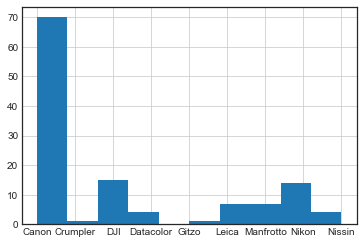

In [71]:
#Häufigste angebotene Brand
df_TOPdeals['brand'].hist()

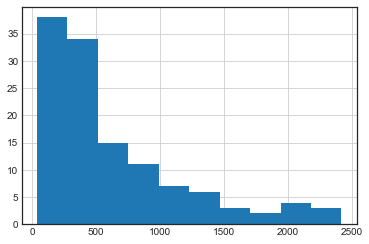

In [74]:
#Verteilung der Produkte nach Price-Range
df_TOPdeals['price_with_shipping'].hist()

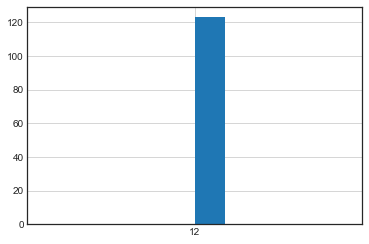

In [78]:
#Ø Versandzeit
df_TOPdeals['delivery_time.1'].hist()

In [415]:
##Mit welchem höchste Überschneidung der Produktliste???
## Vorfilterung der Kunden, => ean Produktliste => Konkurrenten
vorfilterung= 'TOPdeals'
ean_list= df2[df2['seller']==vorfilterung]
konkurrenten= df2[df2['gtin_ean'].isin(ean_list['gtin_ean'].values)]
konkurrenten.seller.value_counts().drop([vorfilterung]).nlargest(15)

amazon                                    107
KÖSTER MÜNSTER                             77
Foto Oehlmann                              66
MEGA-Foto                                  62
e-joker                                    37
fotoversand24                              36
ELECTRONIS                                 31
DUKE FOTOGRAFÍA                            21
Photo Porst Memmingen                      17
FOTO KAESBERG Ruhpolding                   16
NUMIPIXEL                                  16
ZAR Systems                                15
DASTRO ® --- Einfach. Genial. Günstig.     15
shop-ar                                    15
allmedia-dinslaken                         14
Name: seller, dtype: int64

## Preis

In [132]:
# Welche Produkte haben innerhalb Top10 höchste Spreizung
df2_gtin_min= df2.groupby(['gtin_ean']).min()

In [133]:
df2_gtin_min

,product_id,brand,manufacturer_nr,title,min_price,price,max_price,date,class,amount_of_sellers,product_name_channel,seller,reviews,rating_stars,delivery_time.1,price.1,price_with_shipping,shipping_cost.1,suggested_retail_price,url
gtin_ean,,,,,,,,,,,,,,,,,,,,
18208019021,16250,Nikon,JAA011DB,"Nikon AF 1,4/50 D Nikon FX | 100 Wochen Zusat...",284.761905,299.00,313.9500,2017-12-08,1,5.0,"Nikon AF Nikkor 50mm 1:1,4D Objektiv (52 mm Fi...",Vitrax,3.0,4.5,1,329.73,329.73,0.0,NaN,http://www.amazon.de/dp/B00005LENO
18208019106,16826,Nikon,JAA626DA,"Nikon AF 2,8/16 D Fisheye Nikon FX | 100 Woch...",741.904762,779.00,817.9500,2017-12-08,1,4.0,"Nikon AF Fisheye-Nikkor 16mm 1:2,8D Objektiv",amazon,NaN,NaN,1,759.00,759.00,0.0,NaN,http://www.amazon.de/dp/B00005QIZ8
18208019137,16226,Nikon,JAA127DA,"Nikon AF 2,8/20 D Nikon FX | 100 Wochen Zusat...",541.904762,569.00,597.4500,2017-12-08,1,6.0,Nikon AF D 20/2.8 Nikkor Superweitwinkel-Objek...,amazon,43054.0,5.0,1,554.99,554.99,0.0,NaN,http://www.amazon.de/dp/B00005LEOC
18208019229,16430,Nikon,JAA128DA,"Nikon AF 2,8/28 D Nikon FX | 100 Wochen Zusat...",303.809524,319.00,334.9500,2017-12-08,1,7.0,"Nikon AF Nikkor 28 mm/2,8 D Objektiv (52mm Fil...",amazon,12.0,4.5,10,309.75,314.99,0.0,NaN,http://www.amazon.de/dp/B00005LE71
18208019236,16852,Nikon,JAA129DA,"Nikon AF 2,0/35 D Nikon FX | 100 Wochen Zusat...",302.771429,317.91,333.8055,2017-12-08,1,2.0,"Nikon AF Nikkor 35 mm/2,0 D Objektiv (52mm Fil...",amazon,NaN,NaN,1,317.91,317.91,0.0,NaN,http://www.amazon.de/dp/B00005LE72
18208019359,16695,Nikon,JAA329DA,"Nikon AF 2,0/135 D DC Nikon FX | 100 Wochen Z...",1265.714286,1329.00,1395.4500,2017-12-08,1,3.0,"Nikon 135/2,0 DC D",amazon,NaN,NaN,1,1335.00,1335.00,0.0,1539.0,http://www.amazon.de/dp/B00006I5J4
18208019403,16649,Nikon,JAA330DA,"Nikon AF 2,8/180 IF ED D Nikon FX | 100 Woche...",856.190476,899.00,943.9500,2017-12-08,1,2.0,"Nikon AF 180 mm/2,8 D Objektiv (72mm Filtergew...",amazon,NaN,NaN,1,895.00,895.00,0.0,NaN,http://www.amazon.de/dp/B00005LEOI
18208021376,17973,Nikon,JAA013DA,"Nikon AF 1,8/50 D Nikon FX | 100 Wochen Zusat...",125.895238,132.19,138.7995,2017-12-08,1,21.0,"Nikon AF Nikkor 50mm 1:1,8D Objektiv (52mm Fil...",DUKE FOTOGRAFÍA,2.0,4.5,-334,118.98,118.98,0.0,NaN,http://www.amazon.de/dp/B00005LEN4
18208021444,17882,Nikon,JAA784DA,"Nikon AF-S DX 4,0/12-24 G IF-ED schwarz Nikon ...",1052.380952,1105.00,1160.2500,2017-12-08,1,11.0,Nikon AF-S DX Zoom-Nikkor 12-24mm 1:4G IF-ED O...,PC-Tech Store,64.0,5.0,1,1082.90,1082.90,0.0,NaN,http://www.amazon.de/dp/B000092M1T


In [134]:
df2_gtin_max=df2.groupby(['gtin_ean']).max()

In [136]:
df2_gtin= pd.DataFrame()
df2_gtin.insert(loc=0,column='max_price', value=df2_gtin_max['price_with_shipping'])
df2_gtin.insert(loc=0,column='min_price', value=df2_gtin_min['price_with_shipping'])
df2_gtin['price_difference']= df2_gtin['max_price']- df2_gtin['min_price']

In [149]:
#Welche Produkte haben innerhalb Top10 höchste Spreizung
df2_gtin['price_difference'].nlargest(10)

gtin_ean
4022243116672    16345.34
6958265127250     2421.95
8714574650494     2108.96
4960999207322     1948.00
8714574653594     1873.96
18208200634       1842.60
4549292078787     1621.52
6958265107276     1601.95
6958265141225     1501.00
4549292084085     1495.41
Name: price_difference, dtype: float64

In [219]:
#Mittelwert/Median ab wann keine Versandkosten anfallen ??? 
df2.groupby(['gtin_ean'])['shipping_cost.1'].head()
df2_gtin

,min_price,max_price,price_difference
gtin_ean,,,
18208019021,329.73,473.65,143.92
18208019106,759.00,759.00,0.00
18208019137,554.99,691.50,136.51
18208019229,314.99,326.75,11.76
18208019236,317.91,317.91,0.00
18208019359,1335.00,1335.00,0.00
18208019403,895.00,895.00,0.00
18208021376,118.98,306.00,187.02
18208021444,1082.90,1105.00,22.10


In [237]:
#Groupby Verkäufer => Grenze fuer mit/ohne Versandkosten
seller_shipping_cost_max= df2.groupby('seller').max()
seller_shipping_cost_min= df2.groupby('seller').min()
seller_shipping_cost= pd.DataFrame()
seller_shipping_cost.insert(loc=0,column='max_cost', value=seller_shipping_cost_max['shipping_cost.1'])
seller_shipping_cost.insert(loc=0,column='min_cost', value=seller_shipping_cost_min['shipping_cost.1'])
seller_shipping_cost['shipping_cost_diff']= seller_shipping_cost['max_cost']- seller_shipping_cost['min_cost']

In [273]:
seller_shipping_cost.index

Index(['1A Star', '1A-PHOTO-PORST', '1Deins Computer GmbH', '1n1n1',
       '@FoliX GmbH', 'ADLACARVA', 'AFA-Fotohandel e.K.',
       'APPAREL CONNECT (VAT REGISTERED SELLER)',
       'AS-Versand Preise inkl. MwSt.', 'Achatpc',
       ...
       'studioexpress', 'tecedo', 'technikbilliger', 'telefonia ok srl',
       'toneart gmbh',
       'versando - kostenloser DE-Paketversand in 1-2 Tagen ab 9€ - NEU/OVP - Top Qualität!',
       'vollfarbdrucker-de Ihre Office Experten', 'wowcamera', 'xobbox',
       '• plentino Store • günstig Kaufen • schnelle Lieferung • ab 40€ Paketversand kostenfrei •'],
      dtype='object', name='seller', length=291)

In [263]:
seller_shipping_cost[seller_shipping_cost['shipping_cost_diff']>0]

,min_cost,max_cost,shipping_cost_diff
seller,,,
@FoliX GmbH,0.00,0.98,0.98
AndorraFreeMarket,8.99,9.99,1.00
BF2,7.35,7.56,0.21
Bee-Tech-IT,22.00,30.00,8.00
BluePARTSTORE,9.76,12.88,3.12
Brikoland,13.41,14.17,0.76
Crumpler,0.00,5.00,5.00
Cyfrowe.pl,5.12,7.22,2.10
DA TECH PRO,0.00,3.00,3.00


In [252]:
crumpler[crumpler['shipping_cost.1']==0]['price.1'].min()

89.9

In [246]:
crumpler= df2.loc[df2['seller']=='Crumpler']

In [266]:
def shipping_cost_from(seller):
    seller= df2.loc[df2['seller']==seller]
    return seller[seller['shipping_cost.1']==0]['price.1'].min()

In [267]:
print(shipping_cost_from('1A Star'))

39.9


In [274]:
price_from=[]
for item in seller_shipping_cost.index:
    price_from.append(shipping_cost_from(item))

In [276]:
seller_shipping_cost.insert(loc=0,column='no_shipping_cost_from', value=price_from)

In [277]:
seller_shipping_cost

,no_shipping_cost_from,min_cost,max_cost,shipping_cost_diff
seller,,,,
1A Star,39.90,0.00,0.00,0.00
1A-PHOTO-PORST,89.00,0.00,0.00,0.00
1Deins Computer GmbH,42.73,0.00,0.00,0.00
1n1n1,NaN,3.00,3.00,0.00
@FoliX GmbH,7.49,0.00,0.98,0.98
ADLACARVA,NaN,9.99,9.99,0.00
AFA-Fotohandel e.K.,123.49,0.00,0.00,0.00
APPAREL CONNECT (VAT REGISTERED SELLER),151.72,0.00,0.00,0.00
AS-Versand Preise inkl. MwSt.,218.41,0.00,0.00,0.00
